In [1]:
import numpy as np
import pandas as pd
import string

In [2]:
df=pd.read_csv("C:\\Users\\user\\Desktop\\spam.csv",encoding='ISO-8859-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1815,ham,Sian... Aft meeting supervisor got work 2 do l...,NaN,NaN,NaN
2245,ham,How did you find out in a way that didn't incl...,NaN,NaN,NaN
3136,ham,You're right I have now that I think about it,NaN,NaN,NaN
711,ham,It just seems like weird timing that the night...,NaN,NaN,NaN
2604,ham,You call times job today ok umma and ask them ...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### removing last three columns

In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# renaming columns
df.rename(columns={'v1':'target','v2':'msg'},inplace=True)

In [9]:
df.sample(5)

,target,msg
1576,ham,No. To be nosy I guess. Idk am I over reacting...
1449,ham,say thanks2.
2572,ham,"The house is on the water with a dock, a boat ..."
899,spam,Your free ringtone is waiting to be collected....
3566,spam,Collect your VALENTINE'S weekend to PARIS inc ...


### transforming the ham and spam into numerical data by using LabelEncoder from sklearn

In [10]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder().fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [11]:
df['target']=LabelEncoder().fit_transform(df['target'])

In [12]:
df.sample(5)

,target,msg
2987,0,Do you still have the grinder?
4320,0,"K, jason says he's gonna be around so I'll be ..."
4842,0,I need details about that online job.
4026,0,"Yes, princess. Are you going to make me moan?"
555,0,O. Well uv causes mutations. Sunscreen is like...


In [13]:
# check whether the data has missing values
df.isnull().sum()

target    0
msg       0
dtype: int64

In [14]:
#check wheher it has duplicates or not
df.duplicated().sum()

403

In [15]:
df=df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

# 2.EDA


In [18]:
#counting values
a=df['target'].value_counts()
a

target
0    4516
1     653
Name: count, dtype: int64

In [19]:
#representing it in a pie chart
import matplotlib.pyplot as plt

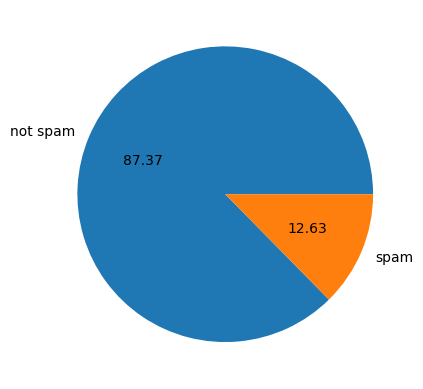

In [20]:
plt.pie(a,labels=['not spam','spam'],autopct="%0.2f")
plt.show()

In [21]:
import nltk


In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
#no.of characters
df['no_of_characters']=df['msg'].apply(len)

In [24]:
df.head()

,target,msg,no_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
#no.of words
no_of_words=df['msg'].apply(lambda x:len(nltk.word_tokenize(x)))
no_of_words

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: msg, Length: 5169, dtype: int64

In [26]:
df["no_of_words"]=no_of_words


In [27]:
df.head()

,target,msg,no_of_characters,no_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
df['msg'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: msg, Length: 5169, dtype: object

In [29]:
df['no_of_sentences']=df['msg'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,msg,no_of_characters,no_of_words,no_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['no_of_characters','no_of_words','no_of_sentences']].describe()

,no_of_characters,no_of_words,no_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#summarizing ham
df[df['target']==0][['no_of_characters','no_of_words','no_of_sentences']].describe()

,no_of_characters,no_of_words,no_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
#summarizing spam
df[df['target']==1][['no_of_characters','no_of_words','no_of_sentences']].describe()

,no_of_characters,no_of_words,no_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [34]:
ham= df[df['target']==0]['no_of_characters']
ham

0       111
1        29
3        49
4        61
6        77
       ... 
5565     12
5568     37
5569     57
5570    125
5571     26
Name: no_of_characters, Length: 4516, dtype: int64

In [35]:
spam= df[df['target']==1]['no_of_characters']
spam

2       155
5       148
8       158
9       154
11      136
       ... 
5537     90
5540    160
5547    160
5566    147
5567    161
Name: no_of_characters, Length: 653, dtype: int64

(array([  7.,  16.,  23.,  23.,  47., 114., 358.,  62.,   2.,   1.]),
 array([ 13. ,  34.1,  55.2,  76.3,  97.4, 118.5, 139.6, 160.7, 181.8,
        202.9, 224. ]),
 <BarContainer object of 10 artists>)

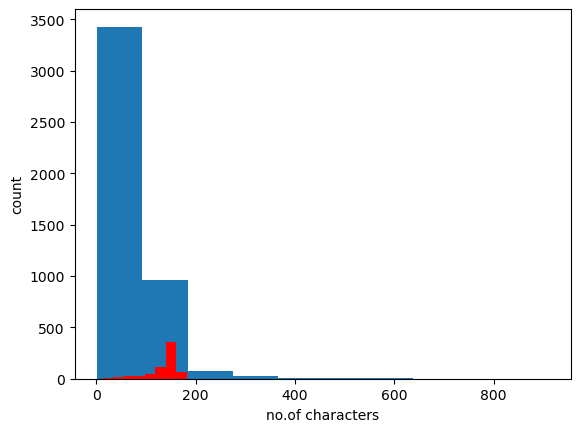

In [36]:
plt.hist(ham)
plt.xlabel("no.of characters")
plt.ylabel("count")
plt.hist(spam,color='red')

In [37]:
wham= df[df['target']==0]['no_of_words']
wham

0       24
1        8
3       13
4       15
6       18
        ..
5565     4
5568     9
5569    15
5570    27
5571     7
Name: no_of_words, Length: 4516, dtype: int64

In [38]:
wspam= df[df['target']==1]['no_of_words']
wspam


2       37
5       39
8       32
9       31
11      31
        ..
5537    18
5540    38
5547    35
5566    30
5567    35
Name: no_of_words, Length: 653, dtype: int64

(array([  5.,  20.,  24.,  31.,  53., 181., 199., 117.,  17.,   6.]),
 array([ 2. ,  6.4, 10.8, 15.2, 19.6, 24. , 28.4, 32.8, 37.2, 41.6, 46. ]),
 <BarContainer object of 10 artists>)

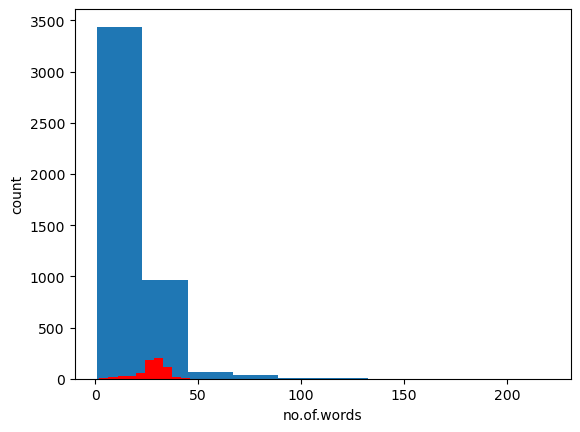

In [39]:
plt.hist(wham)
plt.xlabel("no.of.words")
plt.ylabel("count")
plt.hist(wspam,color='red')

In [40]:
import seaborn as sns

# Data preprocessing

* lower case
* tockenization
* removing special characters
* removing stop words and punctuation
* stemming

In [41]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
from nltk.corpus import stopwords
#stopwords.words('english')

In [43]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')


'love'

In [44]:
def transform(text):
    # changing case
    text=text.lower()
    # tockenizing
    text=nltk.word_tokenize(text)
    # removing special characters
    li=[]
    for i in text:
        if i.isalnum():
            li.append(i)
    text=li.copy()
    li.clear()
    # removing stopwords
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            li.append(i)
    text=li.copy()
    li.clear()
    for i in text:
        li.append(ps.stem(i))
        
    
        
    return " ".join(li)

In [45]:
transform("Hi Tanu ! are you free today to have a coffee .")

'hi tanu free today coffe'

In [46]:
df['transformed_msg']=df['msg'].apply(transform)


In [47]:
df.head()

,target,msg,no_of_characters,no_of_words,no_of_sentences,transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
 spam=df[df['target']==1]['transformed_msg'].tolist()
 

In [49]:
listofswords=[]
for msg in spam:
    for word in msg.split():
        listofswords.append(word)
    

In [50]:
#listofswords

In [51]:
from collections import Counter
spamwordcount=Counter(listofswords).most_common(30)
spamwordcount

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [52]:
df2=pd.DataFrame(spamwordcount)
df2

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


D:\jupiter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jupiter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jupiter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


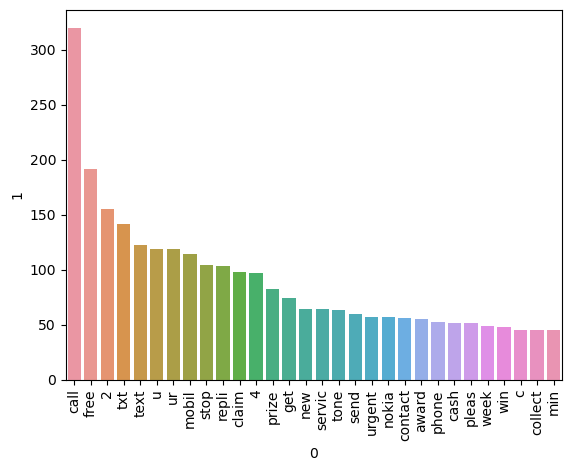

In [53]:
sns.barplot(x=df2[0],y=df2[1],data=df2)
plt.xticks(rotation='vertical')
plt.show()

In [54]:
 ham=df[df['target']==0]['transformed_msg'].tolist()
 

In [55]:
listofhwords=[]
for msg in ham:
    for word in msg.split():
        listofhwords.append(word)
    

In [56]:
#listofhwords

In [57]:
hamwordcount=Counter(listofhwords).most_common(30)
hamwordcount

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

In [58]:
df3=pd.DataFrame(hamwordcount)
df3

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


D:\jupiter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jupiter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\jupiter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


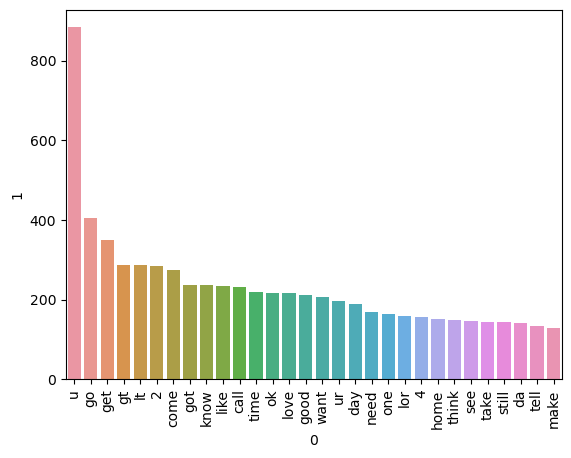

In [59]:
sns.barplot(x=df3[0],y=df3[1],data=df3)
plt.xticks(rotation='vertical')
plt.show()

# 4. model building

In [60]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [61]:
x=tfidf.fit_transform(df['transformed_msg']).toarray()

In [62]:
x.shape

(5169, 6708)

In [63]:
y=df['target'].values

In [64]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [67]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [68]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [69]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [70]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [71]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


## checking with other algorithms

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 


In [73]:

lrc=LogisticRegression()
knn=KNeighborsClassifier()
dt= DecisionTreeClassifier(max_depth=5)


In [74]:
#decision tree
dt.fit(x_train,y_train)
dtpred=dt.predict(x_test)
print(accuracy_score(y_test,dtpred))
print(precision_score(y_test,dtpred))

0.9361702127659575
0.8461538461538461


In [75]:
# k nearest neighbor
knn.fit(x_train,y_train)
knnpred=knn.predict(x_test)
print(accuracy_score(y_test,knnpred))
print(precision_score(y_test,knnpred))

0.9003868471953579
1.0


In [76]:
# logistic regression
lrc.fit(x_train,y_train)
lrcpred=lrc.predict(x_test)
print(accuracy_score(y_test,lrcpred))
print(precision_score(y_test,lrcpred))

0.9468085106382979
0.9882352941176471


### as we can see that the presion is more in multinomial classifier.. so we are going to use that model

In [77]:
sms=['you won the prize']
transformed_sms=tfidf.transform(sms).toarray()

In [78]:
if mnb.predict(transformed_sms)==0:
    print('not spam')
else:
    print('spam')    
    


spam
